In [1]:
outdir <- "/data2/mito_lineage/Analysis/annotation/output/data"
prefix <- "CHIP_april08_2021_Croker/MTblacklist/"
singlecell_sumstats_dir <- "/data2/isshamie/mito_lineage/data/processed/mtscATAC/CHIP_april08_2021_Croker/MTblacklist/"
cellr_indir <- "/data2/isshamie/mito_lineage/data/processed/mtscATAC/CHIP_april08_2021_Croker/MTblacklist"
external_dat_dir <- "/data2/mito_lineage/Analysis/annotation/output/data/granja_cd34"
external_frag_file <- "granja_cd34.fragments.tsv"
external_prefix <- "GSE129785_scATAC-Hematopoiesis-CD34"
exp <- "Flt3l"


In [8]:
frag_file <- file.path(cellr_indir, exp, "outs", "fragments.tsv.gz")
frag_file

[1] "/data2/isshamie/mito_lineage/data/processed/mtscATAC/CHIP_april08_2021_Croker/MTblacklist/Flt3l/outs/fragments.tsv.gz"

In [2]:
library(EnsDb.Hsapiens.v75)

library(Signac)
library(Seurat)
library(data.table)
library(dplyr)
library(umap)
library(SummarizedExperiment)

Loading required package: ensembldb

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loa

In [3]:
genome_dir <- outdir
outdir <- file.path(outdir, prefix)
#dir.create(outdir, recursive=TRUE, showWarnings = TRUE)

In [4]:
if (FALSE){
    BiocManager::install("EnsDb.Hsapiens.v75")
    }

## Make ChromatinAssay

In [5]:
counts <- Read10X_h5(filename = file.path(singlecell_sumstats_dir, exp, "outs", "filtered_peak_bc_matrix.h5"))

metadata <- read.csv(
  file = file.path(singlecell_sumstats_dir, exp, "outs", "singlecell.csv"),
  header = TRUE,
  row.names = 1
)

counts

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
   [[ suppressing 31 column names 'AAACGAAAGGAAACTT-1', 'AAACGAAGTCCAAGAG-1', 'AAACGAAGTCCGAGCT-1' ... ]]

   [[ suppressing 31 column names 'AAACGAAAGGAAACTT-1', 'AAACGAAGTCCAAGAG-1', 'AAACGAAGTCCGAGCT-1' ... ]]

   [[ suppressing 31 column names 'AAACGAAAGGAAACTT-1', 'AAACGAAGTCCAAGAG-1', 'AAACGAAGTCCGAGCT-1' ... ]]



169455 x 5313 sparse Matrix of class "dgCMatrix"
                                                                                            
chr1:9872-10620        . . . . . . . . . . . . . . . . . . . . . . .  . . . . . . . . ......
chr1:96454-96767       . . . . . . . . . . . . . . . . . . . . . . .  . . . . . . . . ......
chr1:180692-181142     . . . . . . . . . . . . . . . . . . . . . . .  . . . . . . . . ......
chr1:191619-191976     . . . . . . . . . . . . . . . . . . . . . . .  . . . . . . . . ......
chr1:267770-268268     . . . . . . . . . . . . . . . . . . . . . . .  . . . . . . . . ......
chr1:271036-271547     . . . . . . . . . . . . . . . . . . . . . . 2  . . . . . . . . ......
chr1:274263-274577     . . . . . . . . . . . . . . . . . . . . . . .  . . . . . . . . ......
chr1:585946-586432     . . . . . . . . . . . . . . . . . . . . . . .  . . . . . . . . ......
chr1:605334-605817     . . . . . . . . . . . . . . . . . . . . . . .  . . . . . . . . ......
chr1:778276-779198   

In [36]:
chrom_assay <- CreateChromatinAssay(
  counts = counts,
  sep = c(":", "-"),
  genome = 'hg38',
  fragments = frag_file,
  min.cells = 10,
  min.features = 200
)

cd34 <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks",
  meta.data = metadata,
  project="internal"
)

Computing hash

Warning message in CreateSeuratObject.Assay(counts = chrom_assay, assay = "peaks", :
"Some cells in meta.data not present in provided counts matrix."


In [37]:
# extract gene annotations from EnsDb
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v75, biotypes = "protein_coding")
seqlevelsStyle(annotations) <- 'UCSC'
genome(annotations) <- "hg38"

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

In [38]:
# add the gene information to the object
Annotation(cd34) <- annotations

In [39]:
# change to UCSC style since the data was mapped to hg19
gene.activities <- GeneActivity(cd34)

Extracting gene coordinates

Extracting reads overlapping genomic regions



In [40]:

# add the gene activity matrix to the Seurat object as a new assay and normalize it
cd34[['RNA']] <- CreateAssayObject(counts = gene.activities)
cd34 <- NormalizeData(
  object = cd34,
  assay = 'RNA',
  normalization.method = 'LogNormalize',
  scale.factor = median(cd34$nCount_RNA)
)

Warning message:
"Non-unique features (rownames) present in the input matrix, making unique"


In [41]:
gene.activities

   [[ suppressing 32 column names 'AAACGAAAGGAAACTT-1', 'AAACGAAGTCCAAGAG-1', 'AAACGAAGTCCGAGCT-1' ... ]]

   [[ suppressing 32 column names 'AAACGAAAGGAAACTT-1', 'AAACGAAGTCCAAGAG-1', 'AAACGAAGTCCGAGCT-1' ... ]]

   [[ suppressing 32 column names 'AAACGAAAGGAAACTT-1', 'AAACGAAGTCCAAGAG-1', 'AAACGAAGTCCGAGCT-1' ... ]]



20010 x 5312 sparse Matrix of class "dgCMatrix"
                                                                                       
PLCXD1         . . . . . . . . . . . .  . . . . . . . . . . .  . . . . . . . . . ......
GTPBP6         . . . . . . . . . . . .  . . . . . . . . . . .  . . . . . . . . . ......
PPP2R3B        1 . . . 2 . . 3 2 . 1 2  2 1 . . 2 . . . . 1 .  4 . 2 2 1 . 1 . 4 ......
SHOX           . . . . . . . . . . . .  . . . . . . . . . . 1  . . . . . . . . . ......
CRLF2          . . 2 1 1 . 1 . . 1 . .  . . . . 1 . . 1 . . .  1 . 1 . . 1 . . . ......
CSF2RA         . 1 1 . 1 1 . 1 . 1 . 2  . . 1 . . . . . . 1 .  1 . . 2 . . . 4 . ......
IL3RA          2 . 1 . 1 . 1 2 . . 1 2  . . . . . 1 . 1 . . 1  . 1 1 . . 1 . 1 . ......
SLC25A6        . . . . . . 1 . 1 . . 1  . . . . . . . . . . .  . . . . . . . . . ......
ASMTL          . 1 1 . . . . . 2 2 . 1  . . 2 1 . . . . . . .  . . . . . . . . 1 ......
P2RY8          1 . 1 . 1 . . . 1 2 . .  2 1 1 . . 2 1 1 . . .  1 1 2 1 1

In [48]:
saveRDS(cd34, file = paste0(outdir, exp, ".cd34.rds"))

In [49]:
cd34

An object of class Seurat 
180378 features across 5312 samples within 2 assays 
Active assay: peaks (160368 features, 0 variable features)
 1 other assay present: RNA

## Analysis if wanted

In [31]:
cd34 <- RunTFIDF(cd34)
cd34 <- FindTopFeatures(cd34, min.cutoff = 'q0')
cd34 <- RunSVD(cd34)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings



Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
07:53:54 UMAP embedding parameters a = 0.9922 b = 1.112

07:53:54 Read 5312 rows and found 29 numeric columns

07:53:54 Using Annoy for neighbor search, n_neighbors = 30

07:53:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:53:55 Writing NN index file to temp file /tmp/RtmpTO7ZwW/filea29b154f266

07:53:55 Searching Annoy index using 1 thread, search_k = 3000

07:53:56 Annoy recall = 100%

07:53:58 Commencing smooth kNN distance calibration using 1 thread

07:54:01 Initializing from

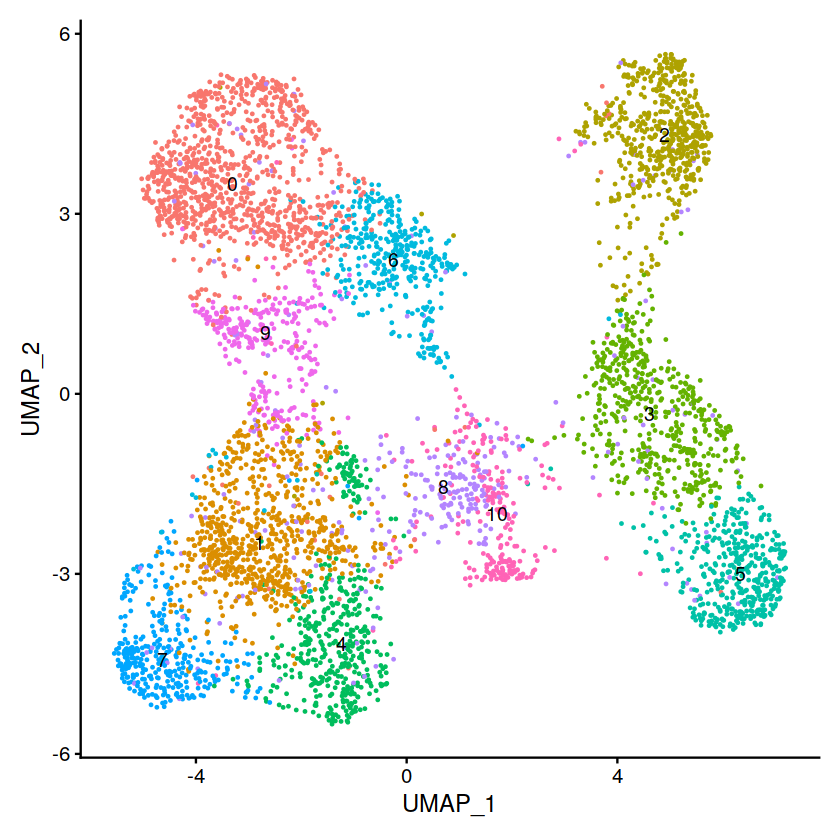

In [32]:
cd34 <- RunUMAP(object = cd34, reduction = 'lsi', dims = 2:30)
cd34 <- FindNeighbors(object = cd34, reduction = 'lsi', dims = 2:30)
cd34 <- FindClusters(object = cd34, verbose = FALSE, algorithm = 3)
DimPlot(object = cd34, label = TRUE) + NoLegend()

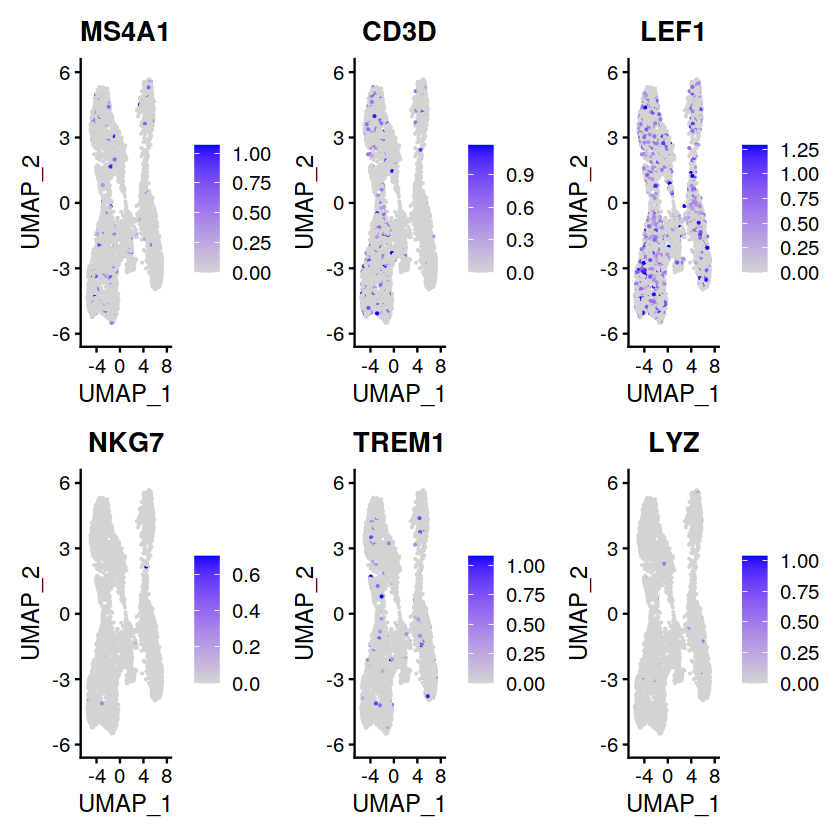

In [33]:
DefaultAssay(cd34) <- 'RNA'

FeaturePlot(
  object = cd34,
  features = c('MS4A1', 'CD3D', 'LEF1', 'NKG7', 'TREM1', 'LYZ'),
  pt.size = 0.1,
  max.cutoff = 'q95',
  ncol = 3
)

In [ ]:
# if(FALSE){
#   library(GenomeInfoDb)
#   library(EnsDb.Hsapiens.v75)
  
#   # extract gene coordinates from Ensembl, and ensure name formatting is consistent with Seurat object 
#   gene.coords <- genes(EnsDb.Hsapiens.v75, filter = ~ gene_biotype == "protein_coding")
#   seqlevelsStyle(gene.coords) <- 'UCSC'
#   genebody.coords <- keepStandardChromosomes(gene.coords, pruning.mode = 'coarse')
#   genebodyandpromoter.coords <- Extend(x = gene.coords, upstream = 2000, downstream = 0)
#   saveRDS(genebodyandpromoter.coords, file.path(genome_dir, "genebodyandpromoter.coords_EnsDb.Hsapiens.v75.rds"))
# }else{
# genebodyandpromoter.coords <- readRDS(file.path(genome_dir, "genebodyandpromoter.coords_EnsDb.Hsapiens.v75.rds"))
# }

# qcdf <- fread(file.path(singlecell_sumstats_dir, exp, "outs", "filtered_peak_bc_matrix", "barcodes.tsv"), header = FALSE, sep = ",", col.names=c('cell_id')) %>% 
#       data.frame() %>% filter(cell_id != "None")
# cells <- as.character(qcdf$cell_id)
# cells

# fragment_file <- file.path(cellr_indir, exp, "outs", "fragments.tsv.gz")
# fragment_file
# #fragment_indir <- file.path(cellr_indir, exp, "outs")

# ## create a gene by cell FeatureMatrix

# fragments <- CreateFragmentObject(fragment_file, cells, validate.fragments=TRUE)
# fragments

# gene.activities <- FeatureMatrix(
#     fragments = fragments,
#     features = genebodyandpromoter.coords,
#     cells = cells,
#     process_n = 32)
# gene.activities

# #     chunk = 10
# #   )
# # convert rownames from chromsomal coordinates into gene names
# gene.key <- genebodyandpromoter.coords$gene_name
# names(gene.key) <- GRangesToString(grange = genebodyandpromoter.coords)
# rownames(gene.activities) <- gene.key[rownames(gene.activities)]
# saveRDS(gene.activities, file =  paste0(outdir, exp,".gene_activities.rds"))



In [ ]:
sessionInfo()